<a href="https://colab.research.google.com/github/kavinm21/Sem_9/blob/main/NS/19PD18_NS_PS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import math

In [ ]:
path = "https://snap.stanford.edu/data/soc-redditHyperlinks-body.tsv"
path1 = "https://snap.stanford.edu/data/soc-redditHyperlinks-title.tsv"

In [ ]:
data = pd.read_csv(path1, sep='\t')
data = data[:200]
display(data.head())

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,"25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,..."
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,"49.0,43.0,0.775510204082,0.0,0.265306122449,0...."
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1,"14.0,14.0,0.785714285714,0.0,0.428571428571,0...."


In [ ]:
s_nodes = data.SOURCE_SUBREDDIT.unique().tolist()
d_nodes = data.TARGET_SUBREDDIT.unique().tolist()
s_ind = [s_nodes.index(x) for x in data['SOURCE_SUBREDDIT']]
d_ind = [d_nodes.index(x) for x in data['TARGET_SUBREDDIT']]
data['S_Node'] = s_ind
data['D_Node'] = d_ind
data = data.loc[data['S_Node'] != data['D_Node']]
s_ind = [s_nodes.index(x) for x in data['SOURCE_SUBREDDIT']]
d_ind = [d_nodes.index(x) for x in data['TARGET_SUBREDDIT']]
data['S_Node'] = s_ind
data['D_Node'] = d_ind

134 2.626865671641791 0.005348258706467662 5.071322775758712


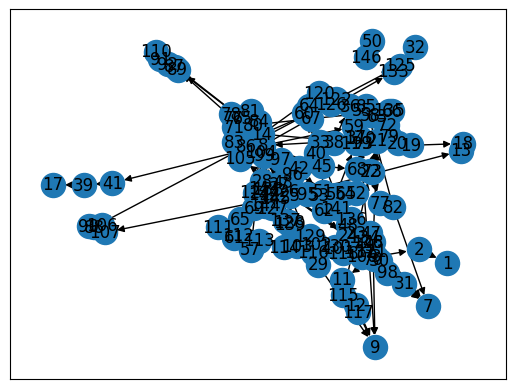

In [ ]:
edges = [(data['S_Node'][x], data['D_Node'][x]) for x in data.index]
G = nx.DiGraph(edges)
nx.draw_networkx(G)
n = G.number_of_nodes()
k = sum(dict(G.degree()).values())/float(n)
c = nx.average_clustering(G)
i = math.log(n) / math.log(k)
print(n, k, c, i)
r1 = ["Reddit Links", n, k, c, i]

152 2.6184210526315788 0.017763157894736842 5.219228495822979


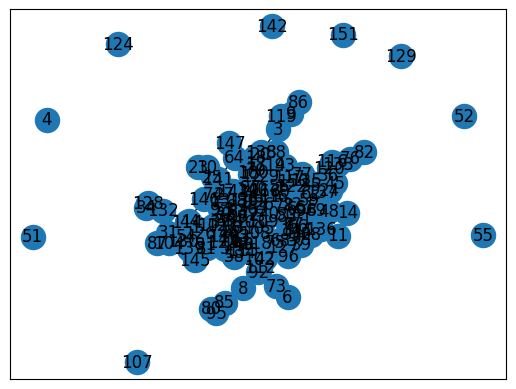

In [ ]:
p = 0.019
R = nx.erdos_renyi_graph(152, p)
nx.draw_networkx(R)
N = R.number_of_nodes()
K = sum(dict(R.degree()).values())/float(N)
C = nx.average_clustering(R)
I = math.log(N) / math.log(K)
print(N, K, C, I)
r2 = [f"ER Graph - {p}", N, K, C, I]

In [ ]:
df = pd.DataFrame([r1, r2], columns=["Graph", "N", '<K>', 'C', 'I'])
display(df)

,Graph,N,<K>,C,I
0,Reddit Links,134,2.626866,0.005348,5.071323
1,ER Graph - 0.019,152,2.618421,0.017763,5.219228
